In [1]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
import plotly.express as px
import matplotlib.pyplot as plt

# Data Preprocessing
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Model
from keras.applications import MobileNetV3Small
from keras.applications import MobileNetV2

# Model training
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.layers import InputLayer

# Model Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from tqdm import tqdm

In [2]:
# Setting constants for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
BATCH_SIZE = 128
IMAGE_SIZE = 224
gender_mapping = ["Male", "Female"]

In [3]:
colab=True
try:
  from google.colab import drive
except:
  colab =False
if colab :
    drive.mount('/content/drive')
    print('g-drive mounted.')
else : print('local drive.')

Mounted at /content/drive
g-drive mounted.


In [18]:
def calculator(dir_name):
  dir_path = f"/content/drive/MyDrive/files/{dir_name}/"
  image_paths = os.listdir(dir_path)
  for path in tqdm(image_paths):
    age = int(path.split("_")[0])
    ages[age] += 1

In [7]:
ages = {i:0 for i in range(130)}
directories = ['UTKFace-Asian','cropped','AAFD-cropped']
for d in directories:
  calculator(d)

100%|██████████| 13015/13015 [00:00<00:00, 690762.23it/s]


In [26]:
male_count = 0
def calculator_c(dir_name):
  dir_path = f"/content/drive/MyDrive/files/{dir_name}/"
  image_paths = os.listdir(dir_path)
  for path in tqdm(image_paths):
    age = int(path.split("_")[0])
    gender = int(path.split("_")[1])
    if gender == 0:
      male_count += 1
    ages.append(age)

In [29]:
ages = []
male_count = 0
directories = ['UTKFace-Asian','cropped','AAFD-cropped']
for d in directories:
  dir_path = f"/content/drive/MyDrive/files/{d}/"
  image_paths = os.listdir(dir_path)
  for path in tqdm(image_paths):
    age = int(path.split("_")[0])
    gender = int(path.split("_")[1])
    if gender == 0:
      male_count += 1
    ages.append(age)

100%|██████████| 13015/13015 [00:00<00:00, 445038.49it/s]


In [30]:
female_count = 3434+39587+13015 - male_count
print(male_count, female_count)

25910 30126


In [ ]:

def image_loader(dir_name):
  dir_path = f"/content/drive/MyDrive/files/{dir_name}/"
  image_paths = os.listdir(dir_path)
  np.random.shuffle(image_paths)
  age_count = [0,0,0,0,0,0,0,0,0]
  result = []
  for path in tqdm(image_paths):
    age = int(path.split("_")[0])
    if 35 < age < 80:
      if age_count[age//10] < COUNT_PER_DATASET*1.5:
        result.append(dir_name+'/'+path)
        age_count[age//10] += 1
    elif 0 <= age <= 35:
      if age_count[age//10] < COUNT_PER_DATASET:
        result.append(dir_name+'/'+path)
        age_count[age//10] += 1
    else:
      if age_count[-1] < COUNT_PER_DATASET:
        result.append(dir_name+'/'+path)
        age_count[-1] += 1
  return result

In [ ]:
directories = ['UTKFace-Asian','cropped','AAFD-cropped']
filtered = []
for d in directories:
  print(d)
  filtered += image_loader(d)
  print('\n')

UTKFace-Asian


100%|██████████| 3434/3434 [00:00<00:00, 571103.88it/s]



cropped



100%|██████████| 39587/39587 [00:00<00:00, 316610.25it/s]




AAFD-cropped


100%|██████████| 13015/13015 [00:00<00:00, 139876.41it/s]

In [ ]:
dir_path = "/content/drive/MyDrive/files/"
save_dir = "/content/drive/MyDrive/files/0718-sampling/"
for path in tqdm(filtered):
  cpCmd = f'cp {dir_path+path} {save_dir}'
  !{cpCmd}

100%|██████████| 7494/7494 [50:14<00:00,  2.49it/s]


In [ ]:
dir_path = "/content/drive/MyDrive/files/0718-sampling"
image_path = os.listdir(dir_path)

Total number of images  : 7494
Sample Image path       : 30_0_2_20170107212049636.jpg.chip.jpg
Sample Age              : 30
Sample Gender           : Male



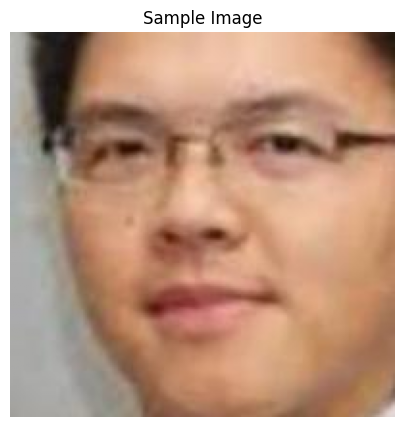

In [ ]:
# Choose and load an image randomly
dir_path = "/content/drive/MyDrive/files/0718-sampling/"
rand_image_path = np.random.choice(image_path)
rand_image = plt.imread(dir_path + rand_image_path)/255.
sample_age, sample_gender, *_ = rand_image_path.split("_")

print(f"Total number of images  : {len(image_path)}")
print(f"Sample Image path       : {rand_image_path}")
print(f"Sample Age              : {sample_age}")
print(f"Sample Gender           : {gender_mapping[int(sample_gender)]}\n")

# Show the image
plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

In [33]:
# # Initialize a male counter variable
# male_count = 0

# # Initialize variable to store all the ages.
# ages = []
# # Loop over the paths and check for male images.
# for path in image_path:
#     path_split = path.split("_")
#     if "0" == path_split[1]:
#         male_count += 1
#     ages.append(int(path_split[0]))

# # Computee total female counts
# female_count = len(image_path) - male_count
male_count = 25910
female_count =  30126


# Visualizing The Class Imbalance
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    hole = 0.4,
    title = "Gender Distribution (Donut Chart)",
    height = 500
)
pie_chart.show()

In [17]:
# Histogram
fig = px.histogram(sorted(ages), title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Value Counts"
)
fig.show()

# Violin Plot
fig = px.violin(x = sorted(ages), title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Distribution"
)
fig.show()

# Box Plot
fig = px.box(x = sorted(ages), notched=True, title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
)
fig.show()